# GAN 실습

참고 : 모두의 딥러닝

링크 : https://thebook.io/080324/0306/

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [2]:
# 생성자 모델을 만듭니다.
generator = Sequential([
    Dense(256, input_dim=100),
    LeakyReLU(alpha=0.2),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(28*28*1, activation='tanh'),  # 결과 이미지의 차원 맞춤
    Reshape((28, 28, 1))
])

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               402192    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 559632 (2.13 MB)
Trainable params: 559632 

In [3]:
# 판별자 모델을 만듭니다.
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
discriminator.summary()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [4]:
# GAN 모델을 만듭니다.
g_input = Input(shape=(100,))
g_output = generator(g_input)
d_output = discriminator(g_output)
gan = Model(g_input, d_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [5]:
epoch = 5000
batch_size = 128
saving_interval = 200


if not os.path.exists('gan_images'):
    os.makedirs('gan_images')

(X_train, _), (_, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_train = (X_train - 127.5) / 127.5  # 데이터 정규화

true = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for i in range(epoch):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    # 손실 값 추출과 스칼라 변환 확인
    d_loss_real = d_loss_real if isinstance(d_loss_real, float) else d_loss_real[0]
    d_loss_fake = d_loss_fake if isinstance(d_loss_fake, float) else d_loss_fake[0]

    # 손실 값의 평균 계산
    d_loss = 0.5 * (d_loss_real + d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)

    # 결과 출력
    print(f'epoch:{i} d_loss:{d_loss:.4f} g_loss:{g_loss:.4f}')

    if i % saving_interval == 0:
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5, 5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                axs[j, k].axis('off')
                count += 1
        fig.savefig(f"gan_images/gan_mnist_{i}.png")
        plt.close(fig)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 6ms/step
epoch:2506 d_loss:0.4654 g_loss:1.7239
4/4 [==============================] - 0s 8ms/step
epoch:2507 d_loss:0.4584 g_loss:1.5818
4/4 [==============================] - 0s 7ms/step
epoch:2508 d_loss:0.5221 g_loss:1.6108
4/4 [==============================] - 0s 10ms/step
epoch:2509 d_loss:0.4438 g_loss:1.6175
4/4 [==============================] - 0s 9ms/step
epoch:2510 d_loss:0.5110 g_loss:1.5979
4/4 [==============================] - 0s 8ms/step
epoch:2511 d_loss:0.4986 g_loss:1.4859
4/4 [==============================] - 0s 9ms/step
epoch:2512 d_loss:0.4921 g_loss:1.4760
4/4 [==============================] - 0s 11ms/step
epoch:2513 d_loss:0.4340 g_loss:1.5538
4/4 [==============================] - 0s 13ms/step
epoch:2514 d_loss:0.4694 g_loss:1.5810
4/4 [==============================] - 0s 9ms/step
epoch:2515 d_loss:0.4855 g_loss:1.5506
4/4 [==============================] - 0s 10ms/step
epoch:251

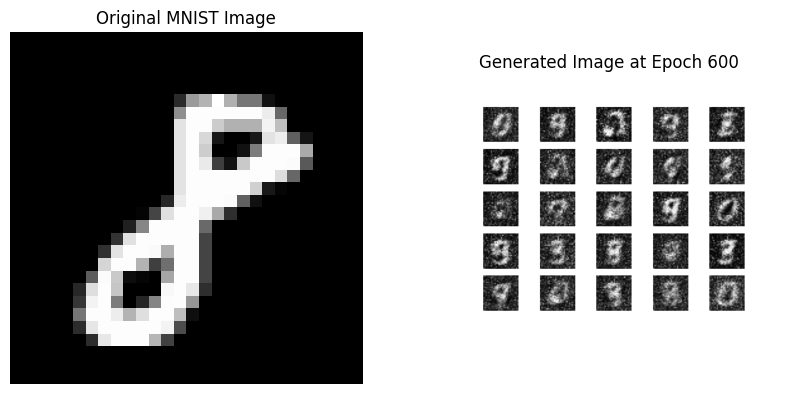

In [14]:
def load_and_compare_images(epoch, example_index=0):
    # MNIST 데이터 불러오기
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5  # Normalize

    # 저장된 이미지 불러오기
    image_path = f"gan_images/gan_mnist_{epoch}.png"
    if not os.path.exists(image_path):
        print("해당 경로에 이미지 파일이 없습니다:", image_path)
        return

    generated_image = mpimg.imread(image_path)

    # 원본 이미지 선택
    original_image = X_train[example_index].reshape(28, 28)

    # 이미지 비교
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original MNIST Image')
    axs[0].axis('off')

    axs[1].imshow(generated_image)
    axs[1].set_title('Generated Image at Epoch ' + str(epoch))
    axs[1].axis('off')

    plt.show()

# 예를 들어, 3000번째 에포크의 생성된 이미지와 원본 이미지 비교
load_and_compare_images(600, example_index=31)
